In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Convolution functions, including:
    - Zero Padding
    - Convolve window 
    - Convolution forward
    - Convolution backward (optional)
- Pooling functions, including:
    - Pooling forward
    - Create mask 
    - Distribute value
    - Pooling backward (optional)

Zero-padding adds zeros around the border of an image:

<img src="images/PAD.png" style="width:600px;height:400px;">
<caption><center> <u> <font color='purple'> <b>Figure 1</b> </u><font color='White'>  : <b>Zero-Padding</b><br> Image (3 channels, RGB) with a padding of 2. </center></caption>


In [10]:
def zero_pad(X, pad):
    X_pad = np.pad(X , ((0, 0),(pad, pad), (pad,pad), (0 , 0)))
    return X_pad


x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


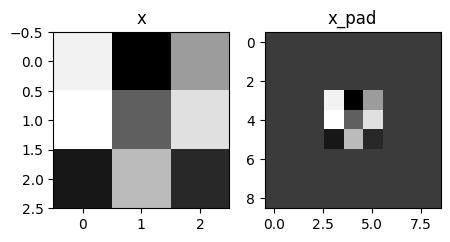

In [11]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

### Single Step of Convolution 

In [14]:
def conv_single_step(a_slice_prev, W, b):

    s = np.multiply(a_slice_prev, W )
    Z = np.sum(s)
    Z = Z + float(b)

    return Z

In [15]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


### Convolutional Neural Networks - Forward Pass
<video width="320" height="140" src="images/conv_kiank.mp4" type="video/mp4" controls>
</video>

In [ ]:
def conv_forward(A_prev, W, b, hparameters):

    (m ,n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    n_H = int((n_H_prev + 2*pad - f)/stride) + 1
    n_W = int((n_W_prev + 2*pad - f)/stride) + 1
    
    Z = np.zeros((m ,n_H , n_W , n_C))
    A_prev_pad = zero_pad(A_prev , pad)
    
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        for h in range(n_H):
            vert_start = stride * h
            vert_end = vert_start + f
            for w in range(n_W):
                horiz_start = stride * w
                horiz_end = horiz_start + f
                
                for c in range(n_C):
                    a_slice_prev = a_prev_pad[vert_start : vert_end, horiz_start: horiz_end, :]
                    weights = W[: , : , : , c]
                    biases = b[: , :, :, c]
                    Z[i, h, w, c] = conv_single_step(a_slice_prev ,weights, biases)

    cache = (A_prev, W, b, hparameters)
    
    return Z, cache